In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [4]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [5]:
# Declare a Base using `automap_base()` base reads the sqlite
base = automap_base()
# Use the Base class to reflect the database tables
base.prepare(autoload_with=engine)

In [6]:
# Print all of the classes mapped to the Base
base.classes.keys()

['station', 'measurement']

In [7]:
# Assign the measurement class to a variable called `Measurement` and
# the station class to a variable called `Station`
Measurement = base.classes.measurement
Station = base.classes.station

In [8]:
# Create a session
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_date = session.query(func.max(Measurement.date)).first()
recent_date

('2017-08-23',)

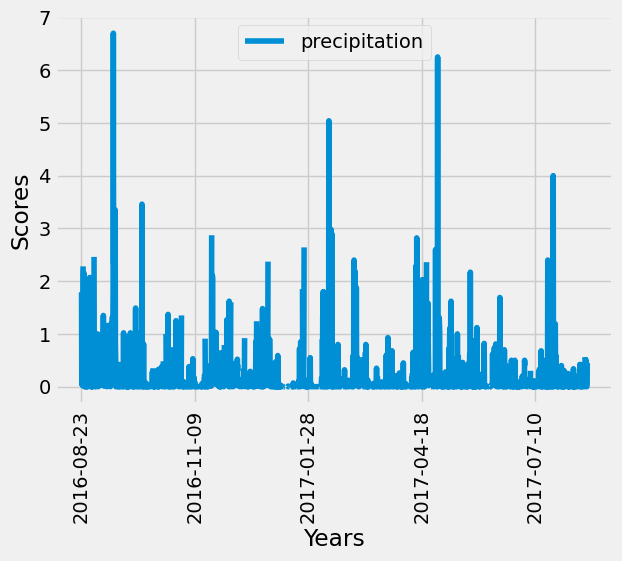

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.

# Calculate the date one year from the last date in data set.
year_later = dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the date and precipitation scores
data = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date>=year_later).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(data,columns=['date', 'precipitation'])

# Sort the dataframe by date
df = df.sort_values("date")

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(x="date",y="precipitation",rot=90)
plt.xlabel("Years")
plt.ylabel("Scores")
plt.show()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(Station.station)).all()
total_stations

[(9,)]

In [20]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
rows = session.query(
    Measurement.station,
    func.count(Measurement.id).label('num_observations')
).group_by(Measurement.station).order_by(func.count(Measurement.id).desc()).all()
df2 = pd.DataFrame(rows)
df2.head()

,station,num+observations
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612


In [25]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
scores = session.query(func.min(Measurement.tobs), 
              func.max(Measurement.tobs), 
              func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
scores

[(54.0, 85.0, 71.66378066378067)]

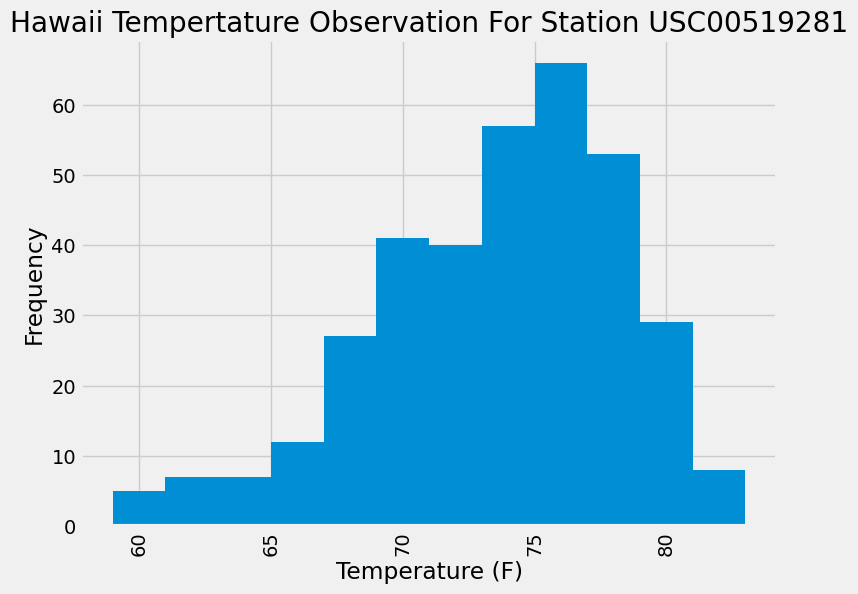

In [32]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
rows = session.query(Measurement.id, Measurement.station,
                    Measurement.date, Measurement.tobs).filter(Measurement.station == 'USC00519281').filter(Measurement.date >= '2016-08-23')
df3 = pd.DataFrame(rows)

plt.figure(figsize=(8, 6))
plt.hist(df3.tobs, bins=12)
plt.title("Hawaii Tempertature Observation For Station USC00519281")
plt.xlabel("Temperature (F)")
plt.ylabel("Frequency")
plt.xticks(rotation = 90)
plt.show()

# Close Session

In [33]:
# Close Session
session.close()
